In [1]:
#Load packages
from netCDF4 import Dataset
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import sys
import netCDF4 as nc4
from torch import nn
from torch import optim
import progressbar
import pytorch_lightning as pl
import torch.nn.functional as F
from torchvision import transforms
from torch import nn
from torch import optim
import progressbar
sys.path.append("/home2/datahome/tpicard/python/Python_Modules_p3_pyticles/")
sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/CNN_SSH_SST/")
import torch
from torch.utils.data import DataLoader, Dataset
import seaborn as sns
#sys.path.append("../")
#from tools_analyse import *
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
plt.rcParams['xtick.labelsize'] = 16  # Taille des ticks sur l'axe des x
plt.rcParams['ytick.labelsize'] = 16  # Taille des ticks sur l'axe des y
plt.rcParams['axes.titlesize'] = 16  # Taille du titre
plt.rcParams['axes.labelsize'] = 16  # Taille du label de l'axe des x
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] = '20.0'

/home2/datahome/tpicard/conda-env/croco/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
def compute_score_box(w,depth_trap,box_size):
    #w = 200
    if w == 80:
        full_time_exp=140
    elif w == 100:
        full_time_exp=120
    elif w == 150:
        full_time_exp=120
    elif w == 200:
        full_time_exp=100
    elif w == 300:
        full_time_exp=100
    else:
        full_time_exp=100
        
    print("w = {0}".format(w))
    
    folder_pdf = '/home/datawork-lemar-apero/tpicard/DATA_CNN/wsed_{0}_stdepth_{1}/'.format(w,depth_trap)
    tpas_start = 0 # First experience ?
    tpas_end = 65 #65 Number of experiences
    date_start = 1900
    date_end = date_start + full_time_exp + 60*(tpas_end-1) # date end
    name_pdf ='pdf_{0:06}_{1:06}_wsed{2}_stdepth{3}_dx100_testing.nc'.format(date_start,date_end,w,depth_trap,100)
    name_pdf_filter = 'filter_'+name_pdf
    
    file = folder_pdf+name_pdf_filter
    #Load data
    nc_data = nc4.Dataset(file, 'r')
    pdf_filter = np.asfortranarray(nc_data.variables['pdf_filter'][:])
    nc_data.close()
    pdf_filter = np.transpose(pdf_filter,(0,2,1,3,4))
    pdf_filter = pdf_filter.reshape(pdf_filter.shape[0]*pdf_filter.shape[1],8,100,100)
    
    box_prediction = np.zeros((100,100))
    if box_size == 200:
        size = 50-12 # 12*8*2 = 192 km box
    elif box_size == 100:
        size = 50-6 # 6*8*2 = 96 km 
    print("Size box = {0} km".format((50-size)*8*2))
    box_prediction[size:-size,size:-size] = 1
    box_prediction[:,:] = box_prediction[:,:]/np.sum(box_prediction[:,:])

    score_box = np.zeros(pdf_filter.shape[0])
    for i in range(score_box.shape[0]):
        score_box[i] = 1 - np.sum(np.sqrt(np.abs((np.multiply(box_prediction[:,:], pdf_filter[i,-1,:,:])))))

    return score_box

def compute_score(w):
        
    dir_save_supermodel = '/home/datawork-lemar-apero/tpicard/DATA_CNN/supermodel/sst_ssh/wsed_sst24_ssh80/'
    name_nc = 'supermodel_wsed_{0}_nmode_10.nc'.format(w)
    file = dir_save_supermodel+name_nc
    
    #LOAD super model
    nc = nc4.Dataset(file,'r')
    bl_surface = np.asfortranarray(nc.variables['bhatta_surface'])
    #supermodel_surface = np.asfortranarray(nc.variables['supermodel_surface'])
    nc.close()
    
    return (bl_surface)

def compute_score_5var(w):

    time_start = 1900
    reste=12
    if w ==80:
        time_end = 5640
    elif w < 200:
        time_end = 5620
    else : 
        time_end = 5600
    dir_save_supermodel = '/home/datawork-lemar-apero/tpicard/DATA_CNN/supermodel/'
    name_nc = 'supermodel_wsed_{0}_sdepth{1}_{2}_{3}_dx2km.nc'.format(w,3000,time_start,time_end)
    file = dir_save_supermodel+name_nc
    
    #LOAD super model
    nc = nc4.Dataset(file,'r')
    bl_surface = np.asfortranarray(nc.variables['bhatta_surface'])
    bl_4L = np.asfortranarray(nc.variables['bhatta_4L'])
    #supermodel_surface = np.asfortranarray(nc.variables['supermodel_surface'])
    #supermodel_4L = np.asfortranarray(nc.variables['supermodel_4L'])
    nc.close()
    
    return (bl_surface,bl_4L)

# Compute score box

In [3]:
depth_trap = 3000
w_list = [80,100,150,200,300]
score_w_box100 =[]
score_w_box200 =[]

for w in w_list:
    score_w_box_i = compute_score_box(w,3000,box_size=100)
    score_w_box100.append(score_w_box_i)
    
    score_w_box_i = compute_score_box(w,3000,box_size=200)
    score_w_box200.append(score_w_box_i)
    
for i in range(0,5):
    print(np.nanmean(score_w_box200[i])) 

w = 80
Size box = 96 km
w = 80
Size box = 192 km
w = 100
Size box = 96 km
w = 100
Size box = 192 km
w = 150
Size box = 96 km
w = 150
Size box = 192 km
w = 200
Size box = 96 km
w = 200
Size box = 192 km
w = 300
Size box = 96 km
w = 300
Size box = 192 km
0.5940939471341057
0.5679617614316683
0.5099792396819668
0.46022703584147184
0.3984991244921831


# Compute score models

In [4]:
# List BL score
depth_trap = 3000
w_list = [80,100,150,200,300]
score_w_surf =[]
score_w_4L =[]
score_w_surf_5var =[]
score_w_4L_5var =[]

for w in w_list:
    score_wi_surf = compute_score(w)
    score_w_surf.append(score_wi_surf)
    score_wi_surf_5var,score_wi_4L_5var = compute_score_5var(w)
    score_w_surf_5var.append(score_wi_surf_5var)
    score_w_4L_5var.append(score_wi_4L_5var)

In [10]:
# List BL score
depth_trap = 3000
w_list = [80,100,150,200,300]
valid_w_surf =[]
#valid_w_4L =[]
valid_w_surf_5var =[]
valid_w_4L_5var =[]
valid_w_box200 = []
valid_w_box100 = []

for i in range(len(w_list)):
    valid_w_surf.append(np.nanmean(np.where(np.array(score_w_surf[i])<0.3,1,0))*100)
    valid_w_surf_5var.append(np.nanmean(np.where(np.array(score_w_surf_5var[i])<0.3,1,0))*100)
    valid_w_4L_5var.append(np.nanmean(np.where(np.array(score_w_4L_5var[i])<0.3,1,0))*100)
    valid_w_box200.append(np.nanmean(np.where(np.array(score_w_box200[i])<0.3,1,0))*100)
    valid_w_box100.append(np.nanmean(np.where(np.array(score_w_box100[i])<0.3,1,0))*100)
    #score_w_4L_5var.append(score_wi_4L_5var)

In [11]:
# List %pdf predicted 

polfit_2 = [ 1.02211979, -1.88530067,  0.91545286]
x_pol = np.linspace(0,1,100)

score_w_surf_5var_per = np.polyval(polfit_2,score_w_surf_5var)
score_w_4L_5var_per  = np.polyval(polfit_2,score_w_4L_5var)

score_w_surf_per = np.polyval(polfit_2,score_w_surf)

score_w_box100_per = np.polyval(polfit_2,score_w_box100)
score_w_box200_per = np.polyval(polfit_2,score_w_box200)

In [12]:
colors

array([[0.2298057 , 0.29871797, 0.75368315, 1.        ],
       [0.48385433, 0.62204985, 0.9748082 , 1.        ],
       [0.75361062, 0.83023285, 0.96087116, 1.        ],
       [0.9473454 , 0.7946955 , 0.71699051, 1.        ],
       [0.9318313 , 0.51908552, 0.40647961, 1.        ],
       [0.70567316, 0.01555616, 0.15023281, 1.        ]])

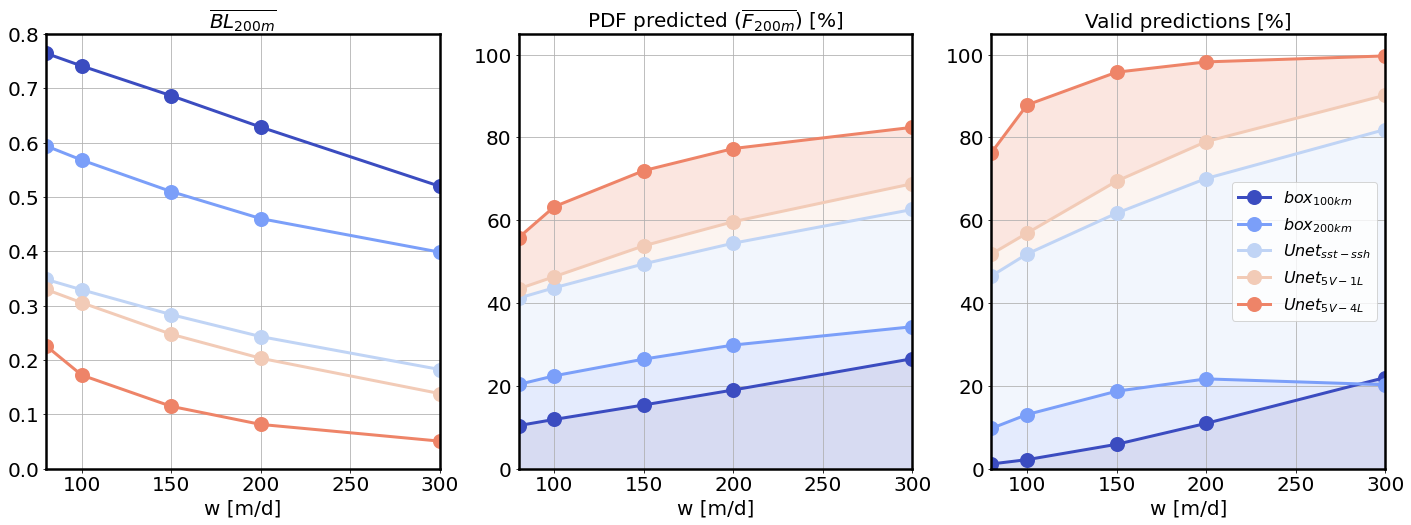

In [16]:
# Bhatta + Per part 
plt.rcParams['lines.linewidth'] = 5
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
plt.rcParams['lines.markersize'] = 12
plt.rcParams['lines.markeredgewidth'] = 3
import matplotlib as mpl
n = 6
colors = plt.cm.coolwarm(np.linspace(0,1,n))
#colors[2,:]=[0,0,0,0]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors) 
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["teal", "k","crimson","c","m"]) 
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
alpha_plot = 1
alpha_fill = 0.2
markersize=200
linewidth = 3
fig = plt.figure(figsize=(24,8))

linestyle = "-"


ax = fig.add_subplot(1,3,1) #BL

#ax2 = ax1.twinx()
#plt.figure()
mean_box100 = np.nanmean(score_w_box100,axis=1)
mean_box200 = np.nanmean(score_w_box200,axis=1)
mean_surf = np.nanmean(score_w_surf,axis=1)
mean_surf_5var = np.nanmean(score_w_surf_5var,axis=1)
mean_4L = np.nanmean(score_w_4L_5var,axis=1)

mean_box200_per = np.nanmean(score_w_box200_per,axis=1)*100
mean_box100_per = np.nanmean(score_w_box100_per,axis=1)*100
mean_surf_per = np.nanmean(score_w_surf_per,axis=1)*100
mean_surf_5var_per = np.nanmean(score_w_surf_5var_per,axis=1)*100
mean_4L_per = np.nanmean(score_w_4L_5var_per,axis=1)*100

plt.plot(w_list,mean_box100,linestyle=linestyle,alpha=alpha_plot,label = '$box_{100m}$',marker="o",linewidth=linewidth)
plt.plot(w_list,mean_box200,linestyle=linestyle,alpha=alpha_plot,label = '$box_{200m}$',marker="o",linewidth=linewidth)
plt.plot(w_list,mean_surf,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{sat}$',marker="o",linewidth=linewidth)
plt.plot(w_list,mean_surf_5var,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{SL-5var}$',marker="o",linewidth=linewidth)
plt.plot(w_list,mean_4L,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{4L-5var}$',marker="o",linewidth=linewidth)



#plt.xticks(size=16)
#plt.yticks(size=16)
plt.title('$\overline{BL_{200m}}$',size=20)

plt.xlabel('w [m/d]',size=20)
#plt.legend(prop={'size': 20})
plt.ylim(0,0.8)
plt.xlim(50,350)
plt.xlim(80,300)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()


ax = fig.add_subplot(1,3,2) # % of pdf predicted


plt.plot(w_list,mean_box100_per,linestyle=linestyle,alpha=alpha_plot,label = '$box_{100m}$',marker="o",linewidth=linewidth)
plt.fill_between(w_list,0,mean_box100_per,linestyle=linestyle,alpha=alpha_fill,linewidth=linewidth)

plt.plot(w_list,mean_box200_per,linestyle=linestyle,alpha=alpha_plot,label = '$box_{200m}$',marker="o",linewidth=linewidth)
plt.fill_between(w_list,mean_box100_per,mean_box200_per,linestyle=linestyle,alpha=alpha_fill,linewidth=linewidth)

plt.plot(w_list,mean_surf_per,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{sat}$',marker="o",linewidth=linewidth)
plt.fill_between(w_list,mean_box200_per,mean_surf_per,linestyle=linestyle,alpha=alpha_fill,linewidth=linewidth)

plt.plot(w_list,mean_surf_5var_per,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{SL-5var}$',marker="o",linewidth=linewidth)
plt.fill_between(w_list,mean_surf_per,mean_surf_5var_per,linestyle=linestyle,alpha=alpha_fill,linewidth=linewidth)

plt.plot(w_list,mean_4L_per,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{4L-5var}$',marker="o",linewidth=linewidth)
plt.fill_between(w_list,mean_surf_5var_per,mean_4L_per,linestyle=linestyle,alpha=alpha_fill,linewidth=linewidth)


plt.xticks(size=20)
plt.yticks(size=20)

#plt.title('PDF predicted ($\overline{\Sigma(P_{i,200m} Q_{i,200m})}$) [%]',size=20)
plt.title('PDF predicted ($\overline{F_{200m}}$) [%]',size=20)


plt.xlabel('w [m/d]',size=20)
#plt.legend(prop={'size': 18},loc=5)
plt.ylim(0,105)
plt.xlim(80,300)
plt.grid()

ax = fig.add_subplot(1,3,3) # % of valid prediction


plt.plot(w_list,valid_w_box100,linestyle=linestyle,alpha=alpha_plot,label = '$box_{100km}$',marker="o",linewidth=linewidth)
plt.fill_between(w_list,0,valid_w_box100,linestyle=linestyle,alpha=alpha_fill,linewidth=linewidth)

plt.plot(w_list,valid_w_box200,linestyle=linestyle,alpha=alpha_plot,label = '$box_{200km}$',marker="o",linewidth=linewidth)
plt.fill_between(w_list,valid_w_box100,valid_w_box200,linestyle=linestyle,alpha=alpha_fill,linewidth=linewidth)

plt.plot(w_list,valid_w_surf,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{sst-ssh}$',marker="o",linewidth=linewidth)
plt.fill_between(w_list,valid_w_box200,valid_w_surf,linestyle=linestyle,alpha=alpha_fill,linewidth=linewidth)

plt.plot(w_list,valid_w_surf_5var,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{5V-1L}$',marker="o",linewidth=linewidth)
plt.fill_between(w_list,valid_w_surf,valid_w_surf_5var,linestyle=linestyle,alpha=alpha_fill,linewidth=linewidth)

plt.plot(w_list,valid_w_4L_5var,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{5V-4L}$',marker="o",linewidth=linewidth)
plt.fill_between(w_list,valid_w_surf_5var,valid_w_4L_5var,linestyle=linestyle,alpha=alpha_fill,linewidth=linewidth)


plt.xticks(size=20)
plt.yticks(size=20)

plt.title('Valid predictions [%]',size=20)
plt.legend(prop={'size': 16},loc=5)

plt.xlabel('w [m/d]',size=20)
#plt.legend(prop={'size': 18},loc=5)
plt.ylim(0,105)
plt.xlim(80,300)
plt.grid()



plt.savefig("w_influence_valid_with_ssh.png",dpi=300,bbox_inches='tight',facecolor="white")


NameError: name 'valid_w_box100' is not defined

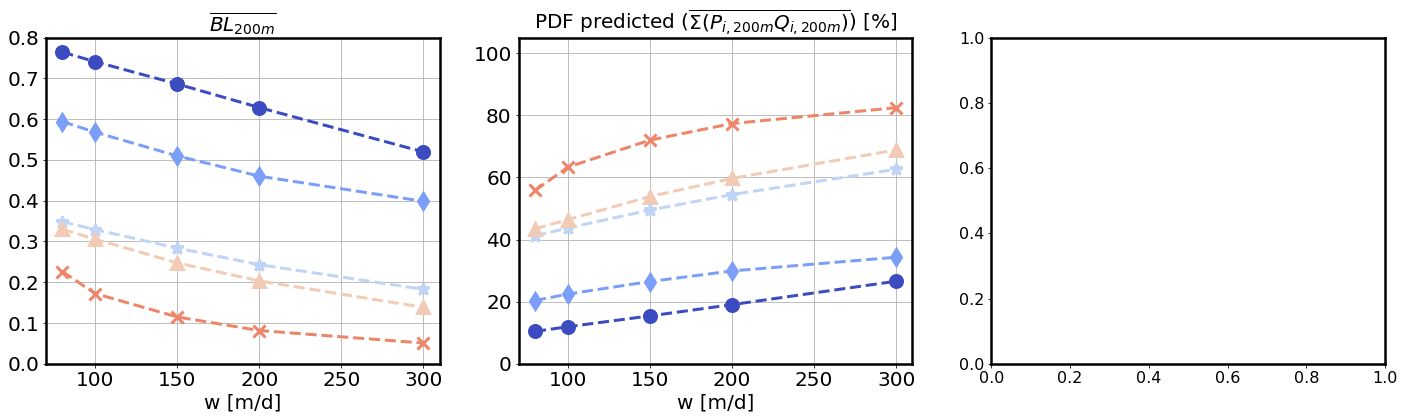

In [9]:
# Bhatta + Per part 
plt.rcParams['lines.linewidth'] = 5
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
plt.rcParams['lines.markersize'] = 12
plt.rcParams['lines.markeredgewidth'] = 3

alpha_plot = 1
markersize=200
linewidth = 3
fig = plt.figure(figsize=(24,6))

linestyle = "--"


ax = fig.add_subplot(1,3,1) #BL

#ax2 = ax1.twinx()
#plt.figure()
mean_box100 = np.nanmean(score_w_box100,axis=1)
mean_box200 = np.nanmean(score_w_box200,axis=1)
mean_surf = np.nanmean(score_w_surf,axis=1)
mean_surf_5var = np.nanmean(score_w_surf_5var,axis=1)
mean_4L = np.nanmean(score_w_4L_5var,axis=1)

mean_box200_per = np.nanmean(score_w_box200_per,axis=1)*100
mean_box100_per = np.nanmean(score_w_box100_per,axis=1)*100
mean_surf_per = np.nanmean(score_w_surf_per,axis=1)*100
mean_surf_5var_per = np.nanmean(score_w_surf_5var_per,axis=1)*100
mean_4L_per = np.nanmean(score_w_4L_5var_per,axis=1)*100

plt.plot(w_list,mean_box100,linestyle=linestyle,alpha=alpha_plot,label = '$box_{100m}$',marker="o",linewidth=linewidth)
plt.plot(w_list,mean_box200,linestyle=linestyle,alpha=alpha_plot,label = '$box_{200m}$',marker="d",linewidth=linewidth)
plt.plot(w_list,mean_surf,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{sat}$',marker="*",linewidth=linewidth)
plt.plot(w_list,mean_surf_5var,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{SL-5var}$',marker="^",linewidth=linewidth)
plt.plot(w_list,mean_4L,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{4L-5var}$',marker="x",linewidth=linewidth)



#plt.xticks(size=16)
#plt.yticks(size=16)
plt.title('$\overline{BL_{200m}}$',size=20)

plt.xlabel('w [m/d]',size=20)
#plt.legend(prop={'size': 20})
plt.ylim(0,0.8)
plt.xlim(50,350)
plt.xlim(70,310)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()


ax = fig.add_subplot(1,3,2) # % of pdf predicted


plt.plot(w_list,mean_box100_per,linestyle=linestyle,alpha=alpha_plot,label = '$box_{100m}$',marker="o",linewidth=linewidth)
plt.plot(w_list,mean_box200_per,linestyle=linestyle,alpha=alpha_plot,label = '$box_{200m}$',marker="d",linewidth=linewidth)
plt.plot(w_list,mean_surf_per,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{sat}$',marker="*",linewidth=linewidth)
plt.plot(w_list,mean_surf_5var_per,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{SL-5var}$',marker="^",linewidth=linewidth)
plt.plot(w_list,mean_4L_per,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{4L-5var}$',marker="x",linewidth=linewidth)

plt.xticks(size=20)
plt.yticks(size=20)

plt.title('PDF predicted ($\overline{\Sigma(P_{i,200m} Q_{i,200m})}$) [%]',size=20)

plt.xlabel('w [m/d]',size=20)
#plt.legend(prop={'size': 18},loc=5)
plt.ylim(0,105)
plt.xlim(70,310)
plt.grid()

ax = fig.add_subplot(1,3,3) # % of valid prediction


plt.plot(w_list,valid_w_box100,linestyle=linestyle,alpha=alpha_plot,label = '$box_{100m}$',marker="o",linewidth=linewidth)
plt.plot(w_list,valid_w_box200,linestyle=linestyle,alpha=alpha_plot,label = '$box_{200m}$',marker="d",linewidth=linewidth)
plt.plot(w_list,valid_w_surf,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{sat}$',marker="*",linewidth=linewidth)
plt.plot(w_list,valid_w_surf_5var,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{SL-5var}$',marker="^",linewidth=linewidth)
plt.plot(w_list,valid_w_4L_5var,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{4L-5var}$',marker="x",linewidth=linewidth)

plt.xticks(size=20)
plt.yticks(size=20)

plt.title('Valid predictions [%]',size=20)
plt.legend(prop={'size': 16},loc=5)

plt.xlabel('w [m/d]',size=20)
#plt.legend(prop={'size': 18},loc=5)
plt.ylim(0,105)
plt.xlim(70,310)
plt.grid()



#plt.savefig("w_influence_valid_with_ssh_no_5var.png",dpi=300,bbox_inches='tight',facecolor="white")


# Plot BL200 + % Valid 

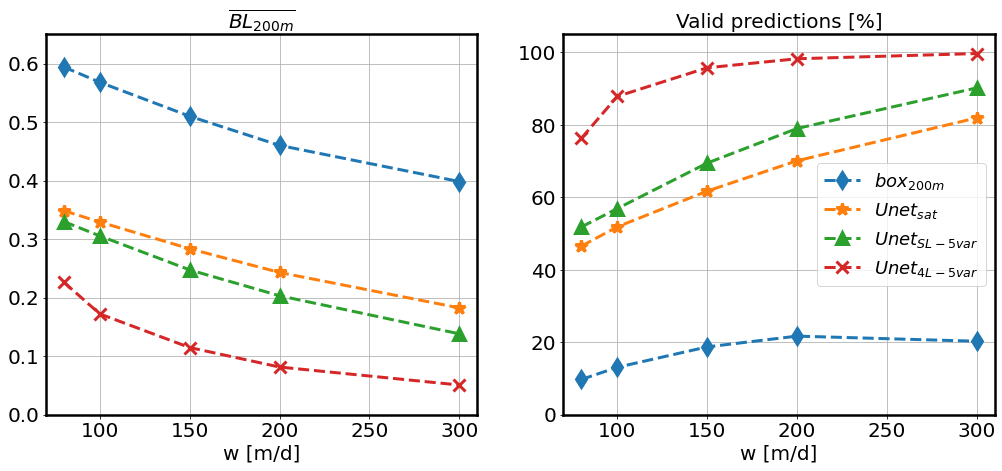

In [36]:
# Bhatta + Per part 
plt.rcParams['lines.linewidth'] = 5
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
plt.rcParams['lines.markersize'] = 12
plt.rcParams['lines.markeredgewidth'] = 3

alpha_plot = 1
markersize=200
linewidth = 3
fig = plt.figure(figsize=(17,7))

linestyle = "--"
ax = fig.add_subplot(1,2,1)

#ax2 = ax1.twinx()
#plt.figure()
#mean_box100 = np.nanmean(score_w_box100,axis=1)
mean_box200 = np.nanmean(score_w_box200,axis=1)
mean_surf = np.nanmean(score_w_surf,axis=1)
mean_surf_5var = np.nanmean(score_w_surf_5var,axis=1)
mean_4L = np.nanmean(score_w_4L_5var,axis=1)

#plt.plot(w_list,mean_box100,linestyle=linestyle,alpha=alpha_plot)
plt.plot(w_list,mean_box200,linestyle=linestyle,alpha=alpha_plot,label = '$box_{200m}$',marker="d",linewidth=linewidth)
plt.plot(w_list,mean_surf,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{sat}$',marker="*",linewidth=linewidth)
plt.plot(w_list,mean_surf_5var,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{SL-5var}$',marker="^",linewidth=linewidth)
plt.plot(w_list,mean_4L,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{4L-5var}$',marker="x",linewidth=linewidth)



#plt.xticks(size=16)
#plt.yticks(size=16)
plt.title('$\overline{BL_{200m}}$',size=20)

plt.xlabel('w [m/d]',size=20)
#plt.legend(prop={'size': 20})
plt.ylim(0,0.65)
plt.xlim(50,350)
plt.xlim(70,310)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()

ax = fig.add_subplot(1,2,2)


#plt.plot(w_list,mean_box100,linestyle=linestyle,alpha=alpha_plot)
plt.plot(w_list,valid_w_box200,linestyle=linestyle,alpha=alpha_plot,label = '$box_{200m}$',marker="d",linewidth=linewidth)
plt.plot(w_list,valid_w_surf,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{sat}$',marker="*",linewidth=linewidth)
plt.plot(w_list,valid_w_surf_5var,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{SL-5var}$',marker="^",linewidth=linewidth)
plt.plot(w_list,valid_w_4L_5var,alpha=alpha_plot,linestyle=linestyle,label = '$Unet_{4L-5var}$',marker="x",linewidth=linewidth)

plt.xticks(size=20)
plt.yticks(size=20)

plt.title('Valid predictions [%]',size=20)

plt.xlabel('w [m/d]',size=20)
plt.legend(prop={'size': 18},loc=5)
plt.ylim(0,105)
plt.xlim(70,310)
plt.grid()

#plt.savefig("w_influence_valid_with_ssh_no_5var.png",dpi =100)

#plt.grid()

In [ ]:
plt.rcParams['lines.linewidth'] = 5
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
plt.rcParams['lines.markersize'] = 10
alpha_plot = 0.3
markersize=200
plt.figure(figsize=(15,10))

plt.plot(w_list,valid_w_box200,alpha=alpha_plot)
plt.plot([0],[0],alpha=alpha_plot)
plt.plot(w_list,valid_w_surf,alpha=alpha_plot)
#plt.plot(0,0)
plt.plot(w_list,valid_w_surf_5var,alpha=alpha_plot)
plt.plot(w_list,valid_w_4L_5var,alpha=alpha_plot)

plt.scatter(w_list,valid_w_box200,label = '200km box',marker="d",s=markersize)
plt.scatter([0],[0],alpha=alpha_plot)
plt.scatter(w_list,valid_w_surf,label = '$Unet_{sst-ssh}$',marker="*",s=markersize)
#plt.scatter(0,0,s=1)

plt.scatter(w_list,valid_w_surf_5var,label = '$Unet_{surf-5var}$',marker="^",s=markersize)
plt.scatter(w_list,valid_w_4L_5var,label = '$Unet_{4L-5var}$',marker="x",s=markersize)

plt.xticks(size=20)
plt.yticks(size=20)

plt.ylabel('Valid predictions ($BL_{200m} > 0.3$) [%]',size=26)
plt.xlabel('w [m/d]',size=26)
plt.legend(prop={'size': 20},loc=5)
plt.ylim(0,105)
plt.xlim(70,310)
plt.grid()

plt.savefig("w_influence_valid_with_ssh_no_5var.png",dpi =100)

In [11]:
score_w_box200_per.shape

(5,)

In [ ]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

alpha_plot = 0.3

plt.figure(figsize=(10,8))

plt.plot(w_list,score_w_box100_per,alpha=alpha_plot)
plt.plot(w_list,score_w_box200_per,alpha=alpha_plot)
plt.plot(w_list,score_w_surf_per,alpha=alpha_plot)
plt.plot(w_list,score_w_surf_5var_per,alpha=alpha_plot)
plt.plot(w_list,score_w_4L_5var_per,alpha=alpha_plot)

plt.scatter(w_list,score_w_box100_per,label = '100km box')
plt.scatter(w_list,score_w_box200_per,label = '200km box',marker="d")
plt.scatter(w_list,score_w_surf_per,label = '$Unet_{sst-ssh}$',marker="*")
plt.scatter(w_list,score_w_surf_5var_per,label = '$Unet_{surf-5var}$',marker="^")
plt.scatter(w_list,score_w_4L_5var_per,label = '$Unet_{4L-5var}$',marker="x")

plt.xticks(size=16)
plt.yticks(size=16)

plt.ylabel('fraction of pdf predicted',size=20)
plt.xlabel('w [m/d]',size=20)
plt.legend(prop={'size': 16})
plt.ylim(0,0.85)
plt.xlim(50,330)
plt.grid()

#plt.savefig("w_influence_per_particles.png",dpi =200)

In [117]:
# NO FILTER
    
def compute_score_box(w,depth_trap,box_size):
    #w = 200
    if w == 80:
        full_time_exp=140
    elif w == 100:
        full_time_exp=120
    elif w == 150:
        full_time_exp=120
    elif w == 200:
        full_time_exp=100
    elif w == 300:
        full_time_exp=100
    else:
        full_time_exp=100
        
    print(full_time_exp)

    folder_pdf = '/home/datawork-lemar-apero/tpicard/DATA_CNN/wsed_{0}_stdepth_{1}/'.format(w,depth_trap)
    tpas_start = 0 # First experience ?
    tpas_end = 65 #65 Number of experiences
    date_start = 1900
    date_end = date_start + full_time_exp + 60*(tpas_end-1) # date end
    name_pdf ='pdf_{0:06}_{1:06}_wsed{2}_stdepth{3}_dx100_testing.nc'.format(date_start,date_end,w,depth_trap,dx_pdf)
    name_pdf_filter = 'filter_'+name_pdf

    file = folder_pdf+name_pdf
    #Load data
    nc_data = nc4.Dataset(file, 'r')
    pdf_filter = np.asfortranarray(nc_data.variables['pdf'][:])
    nc_data.close()
    pdf_filter = np.transpose(pdf_filter,(0,2,1,3,4))
    pdf_filter = pdf_filter.reshape(pdf_filter.shape[0]*pdf_filter.shape[1],8,100,100)

    box_prediction = np.zeros((100,100))
    if box_size == 100:
        size = 50-12 # 12*8 = 96 km --> 96*2km box
    elif box_size == 200:
        size = 50-25 # 12*8 = 200 km 
    print("Size box = {0} km".format((50-size)*8))
    box_prediction[size:-size,size:-size] = 1
    box_prediction[:,:] = box_prediction[:,:]/np.sum(box_prediction[:,:])

    score_box = np.zeros(pdf_filter.shape[0])
    for i in range(score_box.shape[0]):
        score_box[i] = 1 - np.sum(np.sqrt(np.abs((np.multiply(box_prediction[:,:], pdf_filter[i,-1,:,:])))))

    return np.nanmean(score_box)

def compute_score(w,depth_trap):
    time_start = 1900
    reste=12
    if w < 200:
        if w == 80:
            time_end = 5640
        else :
            time_end = 5620
    else : 
        time_end = 5600
    
    dir_save_supermodel = '/home/datawork-lemar-apero/tpicard/DATA_CNN/supermodel/'
    name_nc = 'supermodel_wsed_{0}_sdepth{1}_{2}_{3}_dx2km.nc'.format(w,depth_trap,time_start,time_end)
    file_model = dir_save_supermodel+name_nc
    
    #w = 200
    if w == 80:
        full_time_exp=140
    elif w == 100:
        full_time_exp=120
    elif w == 150:
        full_time_exp=120
    elif w == 200:
        full_time_exp=100
    elif w == 300:
        full_time_exp=100
    else:
        full_time_exp=100
        
    print(full_time_exp)

    folder_pdf = '/home/datawork-lemar-apero/tpicard/DATA_CNN/wsed_{0}_stdepth_{1}/'.format(w,depth_trap)
    tpas_start = 0 # First experience ?
    tpas_end = 65 #65 Number of experiences
    date_start = 1900
    date_end = date_start + full_time_exp + 60*(tpas_end-1) # date end
    name_pdf ='pdf_{0:06}_{1:06}_wsed{2}_stdepth{3}_dx100_testing.nc'.format(date_start,date_end,w,depth_trap,dx_pdf)
    name_pdf_filter = 'filter_'+name_pdf

    file = folder_pdf+name_pdf
    #Load data
    nc_data = nc4.Dataset(file, 'r')
    pdf_filter = np.asfortranarray(nc_data.variables['pdf'][:])
    nc_data.close()
    pdf_filter = np.transpose(pdf_filter,(0,2,1,3,4))
    pdf_filter = pdf_filter.reshape(pdf_filter.shape[0]*pdf_filter.shape[1],8,100,100)

    #LOAD super model
    nc = nc4.Dataset(file_model,'r')
    #bl_surface = np.asfortranarray(nc.variables['bhatta_surface'])
    #bl_4L = np.asfortranarray(nc.variables['bhatta_4L'])
    supermodel_surface = np.asfortranarray(nc.variables['supermodel_surface'])
    supermodel_4L = np.asfortranarray(nc.variables['supermodel_4L'])
    nc.close()
    
    bl_surface = np.zeros(supermodel_surface.shape[0])
    bl_4L = np.zeros(supermodel_4L.shape[0])
    
    for i in range(supermodel_surface.shape[0]):
        bl_surface[i] = 1 - np.sum(np.sqrt(np.abs((np.multiply(supermodel_surface[i,:,:], pdf_filter[i,-1,:,:])))))
        bl_4L[i] = 1 - np.sum(np.sqrt(np.abs((np.multiply(supermodel_4L[i,:,:], pdf_filter[i,-1,:,:])))))

    
    return (np.nanmean(bl_surface),np.nanmean(bl_4L))

In [10]:
depth_trap = 3000
w_list = [80,100,150,200,300]
score_w_surf =[]
score_w_4L =[]

for w in w_list:
    score_wi_surf,score_wi_4L = compute_score(w,depth_trap)
    score_w_surf.append(score_wi_surf)
    score_w_4L.append(score_wi_4L)
    

140
120
120
100
100


In [42]:
depth_trap = 3000
w_list = [80,100,150,200,300]
score_w_box100 =[]
score_w_box200 =[]

for w in w_list:
    score_w_box_i = compute_score_box(w,depth_trap,box_size=100)
    score_w_box100.append(score_w_box_i)
    
    score_w_box_i = compute_score_box(w,depth_trap,box_size=200)
    score_w_box200.append(score_w_box_i)
    

140
Size box = 96 km
140
Size box = 200 km
120
Size box = 96 km
120
Size box = 200 km
120
Size box = 96 km
120
Size box = 200 km
100
Size box = 96 km
100
Size box = 200 km
100
Size box = 96 km
100
Size box = 200 km


In [43]:
polfit_2 = [ 1.02211979, -1.88530067,  0.91545286]
x_pol = np.linspace(0,1,100)
score_w_surf_per = np.polyval(polfit_2,score_w_surf)
score_w_4L_per  = np.polyval(polfit_2,score_w_4L)
score_w_box100_per = np.polyval(polfit_2,score_w_box100)
score_w_box200_per = np.polyval(polfit_2,score_w_box200)

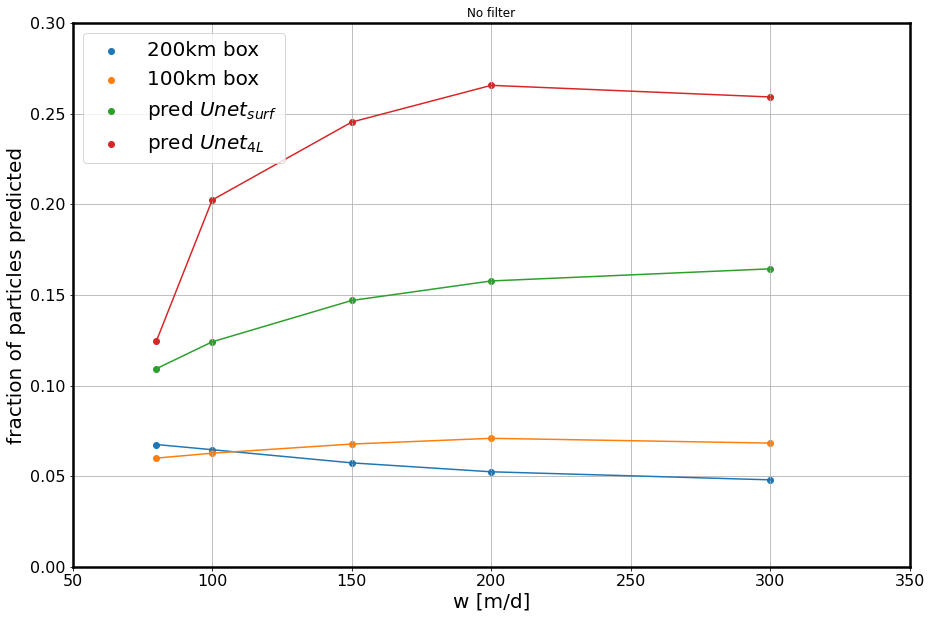

In [44]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

plt.figure(figsize=(15,10))

plt.plot(w_list,score_w_box200_per)
plt.plot(w_list,score_w_box100_per)
plt.plot(w_list,score_w_surf_per)
plt.plot(w_list,score_w_4L_per)

plt.scatter(w_list,score_w_box200_per,label = '200km box')
plt.scatter(w_list,score_w_box100_per,label = '100km box')
plt.scatter(w_list,score_w_surf_per,label = 'pred $Unet_{surf}$')
plt.scatter(w_list,score_w_4L_per,label = 'pred $Unet_{4L}$')

plt.xticks(size=16)
plt.yticks(size=16)

plt.ylabel('fraction of particles predicted',size=20)
plt.xlabel('w [m/d]',size=20)
plt.legend(prop={'size': 20})
plt.ylim(0,0.3)
plt.xlim(50,350)
plt.grid()
plt.title("No filter")
plt.savefig("w_influence_per_particles_pdf_no_filter.png",dpi =400)

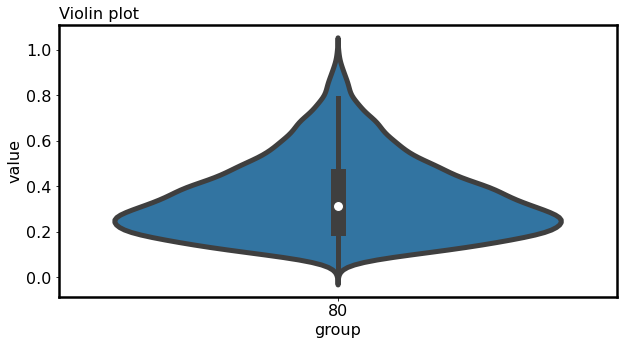

<ipython-input-10-befe69d3a702>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = a.append(b)
<ipython-input-10-befe69d3a702>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(a_i)
<ipython-input-10-befe69d3a702>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(b_i)
<ipython-input-10-befe69d3a702>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(a_i)
<ipython-input-10-befe69d3a702>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(b_i)
<ipython-input-10-befe69d3a702>:33: FutureWarnin

<AxesSubplot:xlabel='wsed', ylabel='BL'>

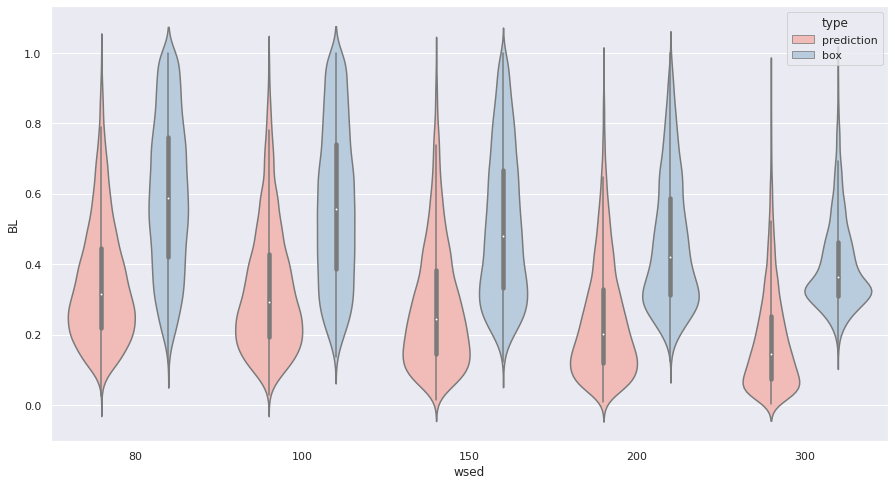

In [10]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
# Dataset:

a = pd.DataFrame({ 'group' : np.repeat(w_list[0],score_w_surf[0].shape[0]), 'value': score_w_surf[0], 'type': "prediction"} )

df=a

# plot violin chart
sns.violinplot( x='group', y='value', data=df)

# add title
plt.title("Violin plot", loc="left")

# show the graph
plt.show()

fig = plt.figure(figsize=(15,8))


a = pd.DataFrame({ 'wsed' : np.repeat(w_list[0],score_w_surf[0].shape[0]), 'BL': score_w_surf[0], 'type': "prediction"} )
b = pd.DataFrame({ 'wsed' : np.repeat(w_list[0],score_w_box200[0].shape[0]), 'BL': score_w_box200[0], 'type': "box"} )

df = a.append(b)
for i in range(1,5):
    #print(w_list[i])
    a_i = pd.DataFrame({ 'wsed' : np.repeat(w_list[i],score_w_surf[i].shape[0]), 'BL': score_w_surf[i], 'type': "prediction"} )
    b_i = pd.DataFrame({ 'wsed' : np.repeat(w_list[i],score_w_box200[i].shape[0]), 'BL': score_w_box200[i], 'type': "box"} )
    df = df.append(a_i)
    df = df.append(b_i)

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# Grouped violinplot
sns.violinplot(x="wsed", y="BL", hue="type", data=df, palette="Pastel1")
#plt.show()